In [2]:
!maturin develop --release

🔗 Found pyo3 bindings
🐍 Found CPython 3.11 at /Users/josh/josh/projects/tech/riversim/.venv/bin/python
💻 Using `MACOSX_DEPLOYMENT_TARGET=10.7` for x86_64-apple-darwin by default
   Compiling riversim v0.1.0 (/Users/josh/josh/projects/tech/riversim)
   --> src/geom.rs:597:5
    |
595 | pub struct Terrain {
    |            ------- field in this struct
596 |     /// Indexed by [`indexing::CellFootprintIndexing`]
597 |     centers: Array3,
    |     ^^^^^^^
    |
    = note: `Terrain` has a derived impl for the trait `Clone`, but this is intentionally ignored during dead code analysis
    = note: `#[warn(dead_code)]` on by default

    Finished release [optimized] target(s) in 2.63s
📦 Built wheel for CPython 3.11 to /var/folders/w9/c8qym84j2pg4fjvx_bzr84bc0000gn/T/.tmpgaxzdw/riversim-0.1.0-cp311-cp311-macosx_10_7_x86_64.whl
🛠 Installed riversim-0.1.0


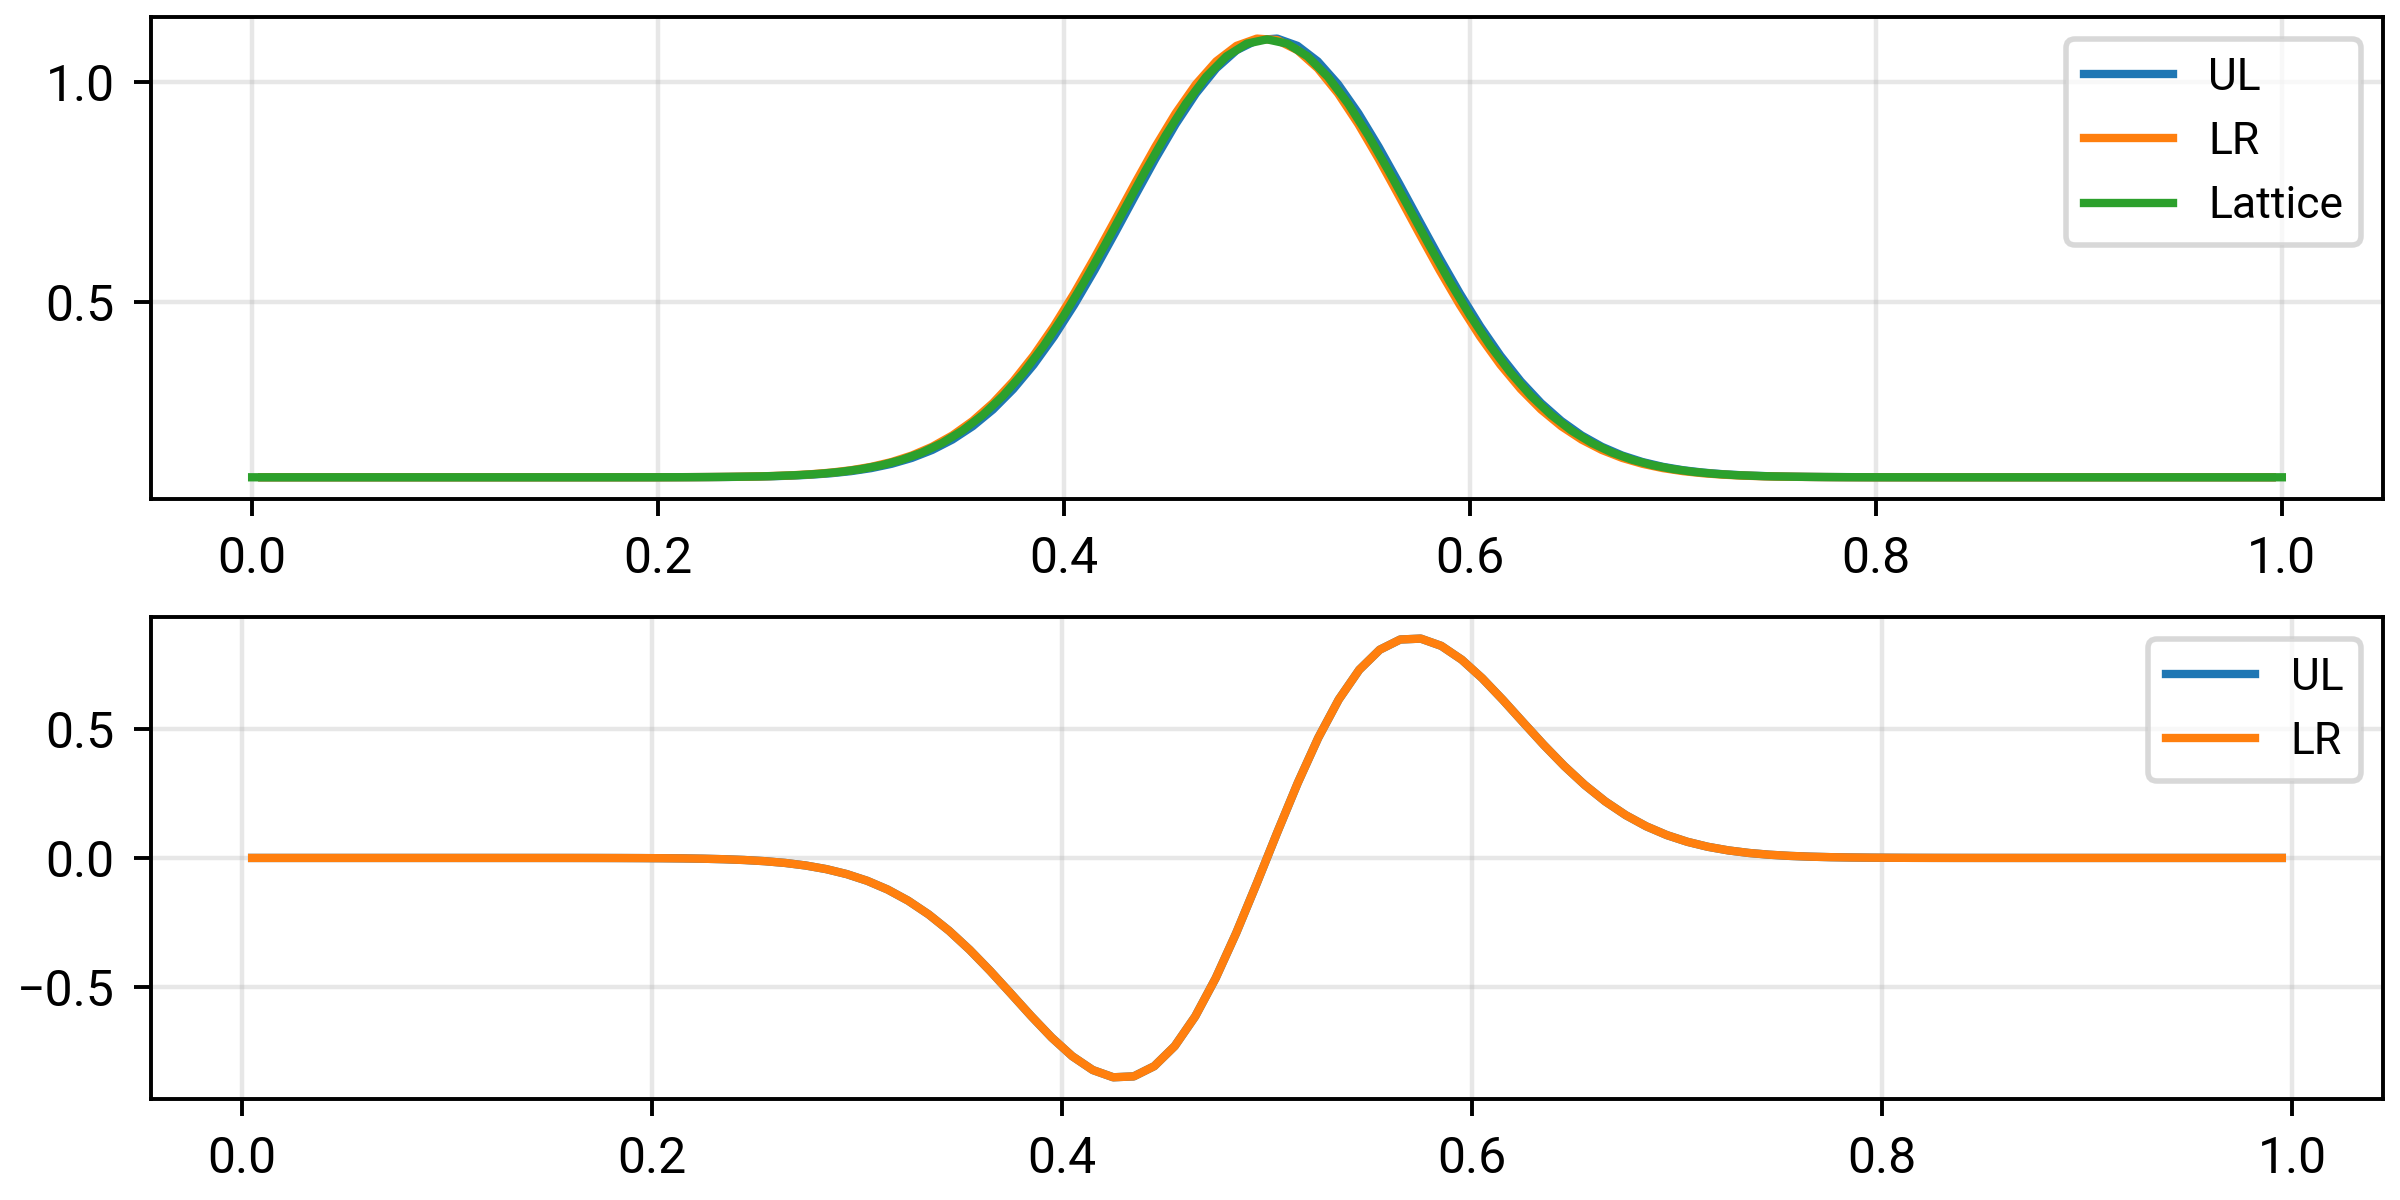

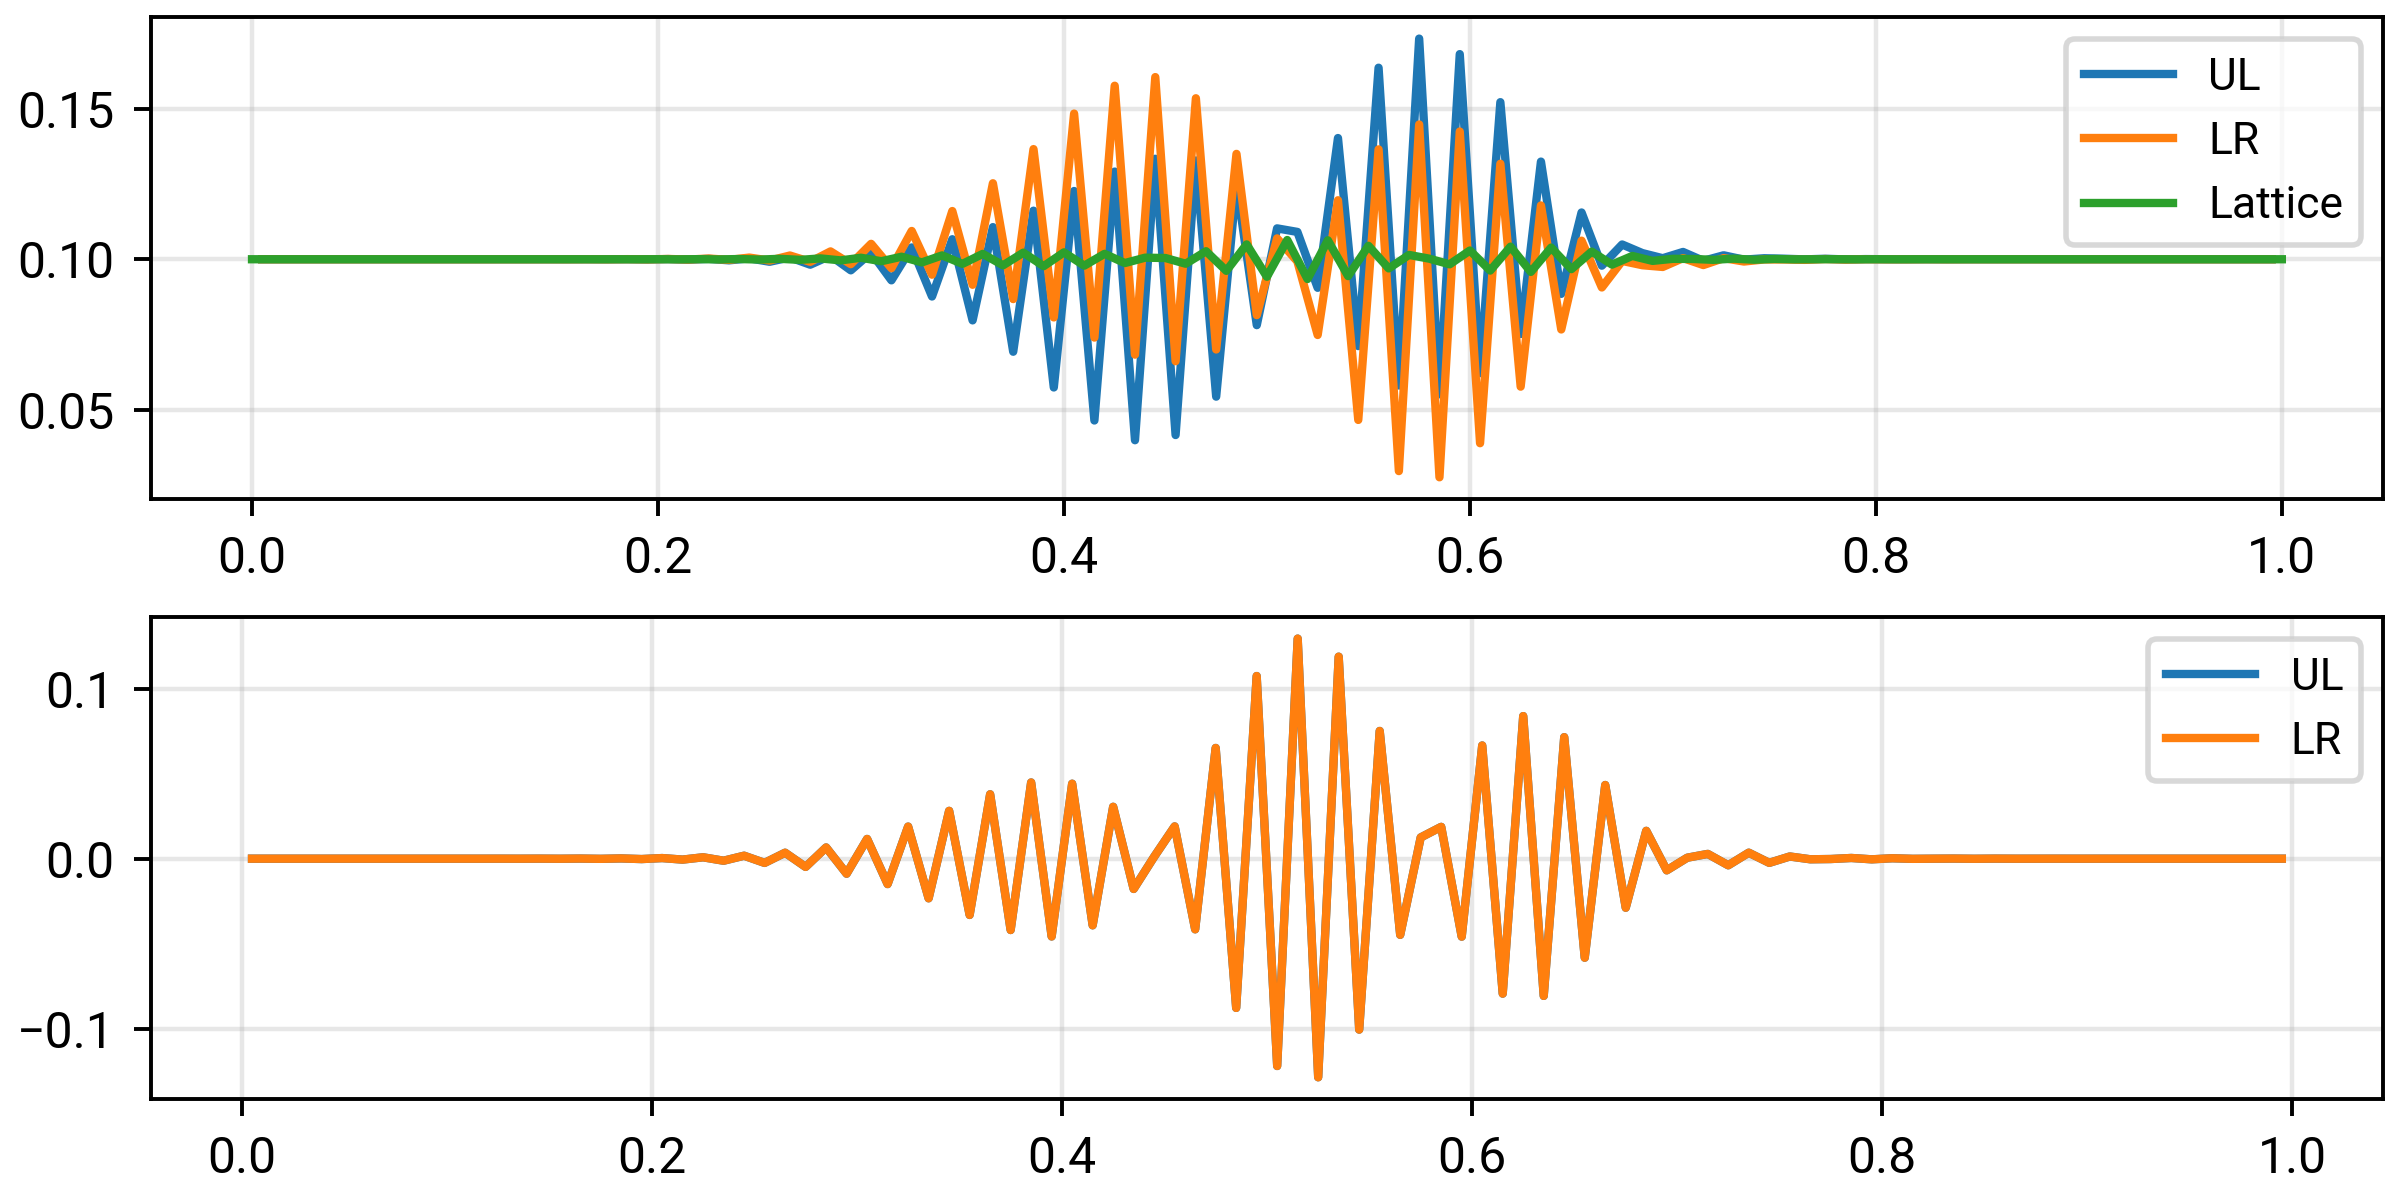

In [10]:
from joshpyutil import mpl

import riversim

solver = riversim.advection_1d(100, 20)

with mpl.autoplot(2) as ap:
    ap.plot(solver.grid.x_axis.centers, solver.height[:, 0, 0], label='UL')
    ap.plot(solver.grid.x_axis.centers, solver.height[:, 0, 1], label='LR')
    ap.plot(solver.grid.x_axis.vertices, solver.z_lattice[:, 0, -1], label='Lattice')
    ap.legend()

    ap = ap.next()
    ap.plot(solver.grid.x_axis.centers, solver.compute_height_time_deriv()[:, 0, 0], label='UL')
    ap.plot(solver.grid.x_axis.centers, solver.compute_height_time_deriv()[:, 0, 1], label='LR')
    ap.legend()

for _ in range(1000):
    solver.step(0.01)

with mpl.autoplot(2) as ap:
    ap.plot(solver.grid.x_axis.centers, solver.height[:, 0, 0], label='UL')
    ap.plot(solver.grid.x_axis.centers, solver.height[:, 0, 1], label='LR')
    ap.plot(solver.grid.x_axis.vertices, solver.z_lattice[:, 0, -1], label='Lattice')
    ap.legend()

    ap = ap.next()
    ap.plot(solver.grid.x_axis.centers, solver.compute_height_time_deriv()[:, 0, 0], label='UL')
    ap.plot(solver.grid.x_axis.centers, solver.compute_height_time_deriv()[:, 0, 1], label='LR')
    ap.legend()